![T-20 Cricket](https://github.com/Shamsvi/CMSE-830/raw/main/MidtermPorject/t-20%20cricket.png)


### Importing Necessary Libraries

In [72]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st
import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


### Loading The Datasets

In [75]:
matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_t20_world_cup_matches_results.csv'
players_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_t20_world_cup_players_list.csv'
final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/wc_final_dataset.csv'
captains_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_captains.csv'

# Load the datasets from the URLs
all_matches_data_df = pd.read_csv(matches_url)
players_df = pd.read_csv(players_url)
wc_final_data_df = pd.read_csv(final_dataset_url)
captains_df = pd.read_csv(captains_url)

In [77]:
print(players_df)

             Team  Year           Player Name
0     Afghanistan  2010         Nawroz Mangal
1     Afghanistan  2010         Asghar Afghan
2     Afghanistan  2010           Karim Sadiq
3     Afghanistan  2010      Mohammad Shahzad
4     Afghanistan  2010       Noor Ali Zadran
...           ...   ...                   ...
1975     Zimbabwe  2022         Sikandar Raza
1976     Zimbabwe  2022        Tendai Chatara
1977     Zimbabwe  2022  Wellington Masakadza
1978     Zimbabwe  2022   Blessing Muzarabani
1979     Zimbabwe  2022       Richard Ngarava

[1980 rows x 3 columns]


In [79]:
print(wc_final_data_df)

            Team1      Team2        Winner     Margin        Ground  \
0           India   Pakistan         India     5 runs  Johannesburg   
1       Australia      India         India    15 runs        Durban   
2     New Zealand   Pakistan      Pakistan  6 wickets     Cape Town   
3    South Africa      India         India    37 runs        Durban   
4      Bangladesh   Pakistan      Pakistan  4 wickets     Cape Town   
..            ...        ...           ...        ...           ...   
312   Afghanistan     Uganda   Afghanistan   125 runs    Providence   
313  South Africa  Sri Lanka  South Africa  6 wickets      New York   
314       Namibia       Oman          tied          -    Bridgetown   
315   West Indies        PNG   West Indies  5 wickets    Providence   
316           USA     Canada           USA  7 wickets        Dallas   

     Match Date T-20 Int Match  Team1 Avg Batting Ranking  \
0    2007/09/24      T20I # 46                      67.13   
1    2007/09/22      T20I

In [81]:
print(captains_df)

                     Team       Player Name  Year  Unnamed: 3  Unnamed: 4  \
0                   India          MS Dhoni  2007         NaN         NaN   
1                Pakistan      Shoaib Malik  2007         NaN         NaN   
2               Australia     Ricky Ponting  2007         NaN         NaN   
3            South Africa      Graeme Smith  2007         NaN         NaN   
4                 England  Paul Collingwood  2007         NaN         NaN   
..                    ...               ...   ...         ...         ...   
211  United Arab Emirates                 -  2024         NaN         NaN   
212                 P.N.G   Assadollah Vala  2024         NaN         NaN   
213                Canada    Saad Bin Zafar  2024         NaN         NaN   
214                Uganda      Brian Masaba  2024         NaN         NaN   
215               Namibia   Gerhard Erasmus  2024         NaN         NaN   

     Unnamed: 5  Unnamed: 6  Unnamed: 7  
0           NaN         NaN      

### IDA 

In [84]:
import re
import pandas as pd

# Define functions once
def extract_numeric_value(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None

def extract_t20_int_match(value):
    match = re.search(r'# (\d+)', str(value))  # Extract the number after the hash symbol
    return int(match.group(1)) if match else None

# Apply transformations to the wc_final_data_df
wc_final_data_df['T-20 Int Match'] = wc_final_data_df['T-20 Int Match'].apply(extract_t20_int_match)

# Convert 'Match Date' to datetime and extract year, month, day
wc_final_data_df['Match Date'] = pd.to_datetime(wc_final_data_df['Match Date'], format='%Y/%m/%d')
wc_final_data_df['Match Year'] = wc_final_data_df['Match Date'].dt.year
wc_final_data_df['Match Month'] = wc_final_data_df['Match Date'].dt.month
wc_final_data_df['Match Day'] = wc_final_data_df['Match Date'].dt.day

# Drop the original 'Match Date' column
wc_final_data_df = wc_final_data_df.drop(columns=['Match Date'])

# Display the first few rows of the updated dataframe
print(wc_final_data_df.head())

# Save the updated dataframe
wc_final_data_df.to_csv('updated_wc_final_data_df.csv', index=False)


          Team1     Team2    Winner     Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5 runs  Johannesburg              46   
1     Australia     India     India    15 runs        Durban              45   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town              44   
3  South Africa     India     India    37 runs        Durban              43   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1                      58.77                  

### Missingness

In [87]:
missing_values_all_matches = all_matches_data_df.isnull().sum()
missing_values_wc_final_dataset = wc_final_data_df.isnull().sum()
missing_values_players = players_df.isnull().sum()
missing_values_captains = captains_df.isnull().sum()


# Print the missing values for each dataset
print("Missing values in all_matches_data_df:\n", missing_values_all_matches)
print("Missing values in final_dataset_df:\n", missing_values_wc_final_dataset)
print("Missing values in players_df:\n", missing_values_players)
print("Missing values in captains_df:\n", missing_values_players)

Missing values in all_matches_data_df:
 Team1             0
Team2             0
Winner            0
Margin            0
Ground            0
Match Date        0
T-20 Int Match    0
dtype: int64
Missing values in final_dataset_df:
 Team1                           0
Team2                           0
Winner                          0
Margin                          0
Ground                          0
T-20 Int Match                  0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total WCs participated    0
Team1 Total WCs won             0
Team2 Total WCs participated    0
Team2 Total WCs won             0
Team1 win % over Team2          0
Match Year                      0
Match Month                     0
Match Day                       0
dtype: int64
Missing values in players_df:
 Team           0
Year           0
Player Name    0
dtype: int64
Missing values in captains_df:
 Team           0
Y

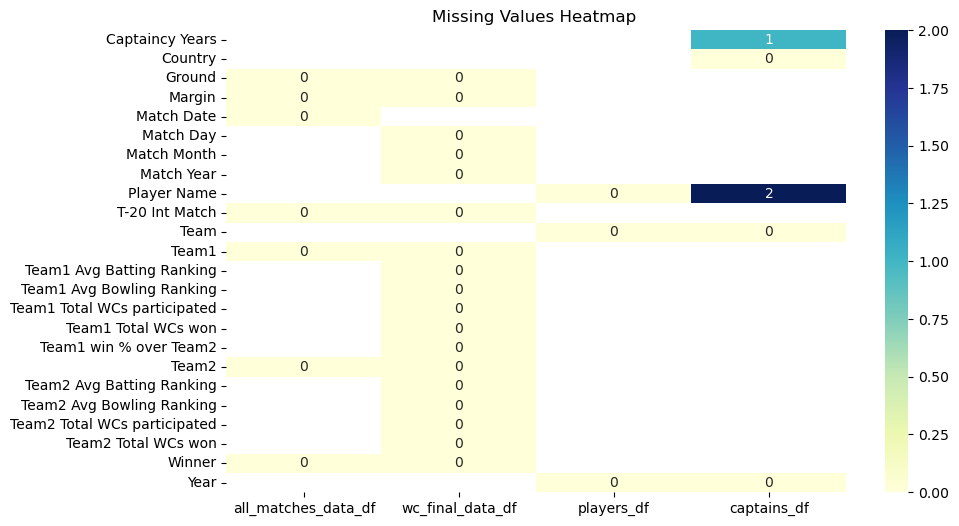

In [131]:
%matplotlib inline

# Assuming your missing values have already been calculated
missing_values_captains = pd.Series([2, 0, 0, 1, 0], index=['Player Name', 'Team', 'Year', 'Captaincy Years', 'Country'])

# Combine the missing values into a DataFrame for a heatmap, including captains_df
missing_data_updated = pd.DataFrame({
    'all_matches_data_df': missing_values_all_matches,
    'wc_final_data_df': missing_values_wc_final_dataset,
    'players_df': missing_values_players,
    'captains_df': missing_values_captains
})

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data_updated, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Missing Values Heatmap ')
plt.show()

In [91]:
# Display rows in captains_df that contain missing values
missing_captains_rows = captains_df[captains_df.isnull().any(axis=1)]

# Show the rows with missing values
print(missing_captains_rows)


                     Team       Player Name  Year  Unnamed: 3  Unnamed: 4  \
0                   India          MS Dhoni  2007         NaN         NaN   
1                Pakistan      Shoaib Malik  2007         NaN         NaN   
2               Australia     Ricky Ponting  2007         NaN         NaN   
3            South Africa      Graeme Smith  2007         NaN         NaN   
4                 England  Paul Collingwood  2007         NaN         NaN   
..                    ...               ...   ...         ...         ...   
211  United Arab Emirates                 -  2024         NaN         NaN   
212                 P.N.G   Assadollah Vala  2024         NaN         NaN   
213                Canada    Saad Bin Zafar  2024         NaN         NaN   
214                Uganda      Brian Masaba  2024         NaN         NaN   
215               Namibia   Gerhard Erasmus  2024         NaN         NaN   

     Unnamed: 5  Unnamed: 6  Unnamed: 7  
0           NaN         NaN      

### Data cleaning

In [94]:
# Define functions 
def extract_numeric_value(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None
def extract_t20_int_match(value):
    match = re.search(r'# (\d+)', str(value))  # Extract the number after the hash symbol
    return int(match.group(1)) if match else None

# Margins Column into Margb (runs) and Margin (Wickets)
def extract_runs_correct(margin):
    if isinstance(margin, str) and 'runs' in margin:
        return float(margin.split()[0])  # Extract the number for runs
    return None

def extract_wickets_correct(margin):
    if isinstance(margin, str) and 'wickets' in margin:
        return float(margin.split()[0])  # Extract the number for wickets
    return None

# 
wc_final_data_df['Margin (Runs)'] = wc_final_data_df['Margin'].apply(extract_runs_correct)
wc_final_data_df['Margin (Wickets)'] = wc_final_data_df['Margin'].apply(extract_wickets_correct)

# Display the updated dataframe with the new columns
wc_final_data_df[['Margin', 'Margin (Runs)', 'Margin (Wickets)']].head()

print(wc_final_data_df.head())

# Save the updated dataframe
wc_final_data_df.to_csv('updated_wc_final_data_df.csv', index=False)


          Team1     Team2    Winner     Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5 runs  Johannesburg              46   
1     Australia     India     India    15 runs        Durban              45   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town              44   
3  South Africa     India     India    37 runs        Durban              43   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1                      58.77                  

In [96]:
# Drop the unnamed columns from captains_df
captains_df_cleaned = captains_df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])

# Display the cleaned DataFrame
print(captains_df_cleaned)

                     Team       Player Name  Year
0                   India          MS Dhoni  2007
1                Pakistan      Shoaib Malik  2007
2               Australia     Ricky Ponting  2007
3            South Africa      Graeme Smith  2007
4                 England  Paul Collingwood  2007
..                    ...               ...   ...
211  United Arab Emirates                 -  2024
212                 P.N.G   Assadollah Vala  2024
213                Canada    Saad Bin Zafar  2024
214                Uganda      Brian Masaba  2024
215               Namibia   Gerhard Erasmus  2024

[216 rows x 3 columns]


### Missingness #2

In [99]:
missing_values = wc_final_data_df.isnull().sum()

# Display the missing values in each column
missing_values

Team1                             0
Team2                             0
Winner                            0
Margin                            0
Ground                            0
T-20 Int Match                    0
Team1 Avg Batting Ranking         0
Team2 Avg Batting Ranking         0
Team1 Avg Bowling Ranking         0
Team2 Avg Bowling Ranking         0
Team1 Total WCs participated      0
Team1 Total WCs won               0
Team2 Total WCs participated      0
Team2 Total WCs won               0
Team1 win % over Team2            0
Match Year                        0
Match Month                       0
Match Day                         0
Margin (Runs)                   166
Margin (Wickets)                169
dtype: int64

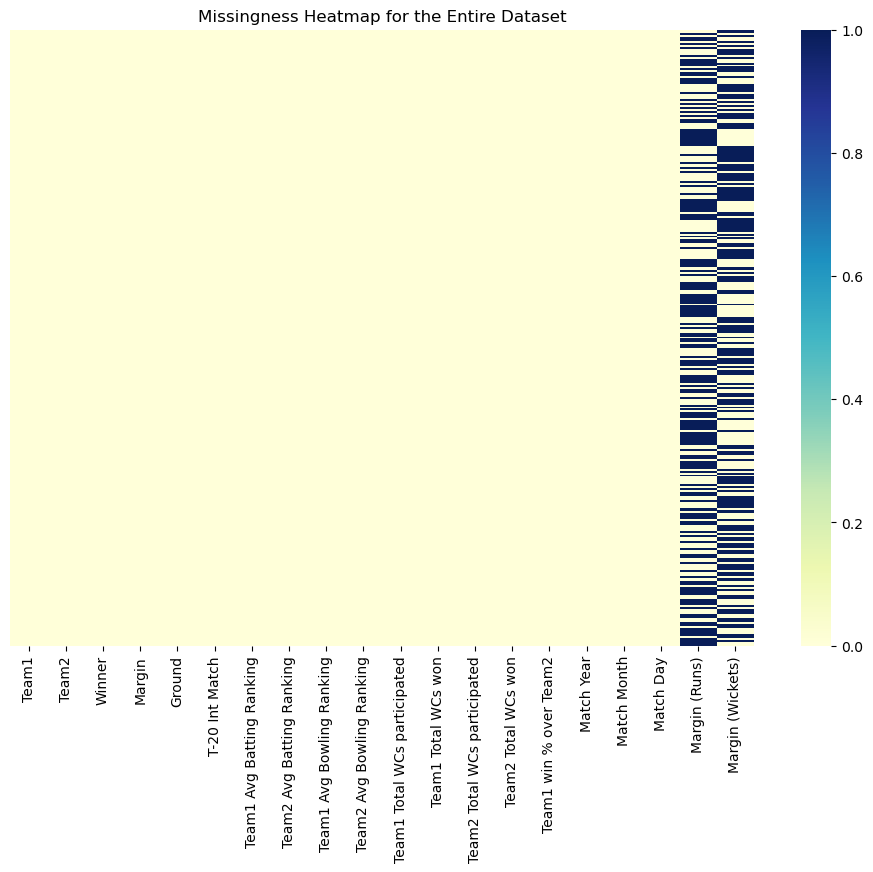

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(wc_final_data_df.isnull(), cmap="YlGnBu", cbar=True, yticklabels=False)
plt.title('Missingness Heatmap for the Entire Dataset')
plt.show()

### EDA

In [104]:
# Checking the correlation between missing values for each column
missing_correlation = wc_final_data_df.isnull().corr()

# Display the correlation matrix for missingness
missing_correlation


,Team1,Team2,Winner,Margin,Ground,T-20 Int Match,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2,Match Year,Match Month,Match Day,Margin (Runs),Margin (Wickets)
Team1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Winner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Margin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T-20 Int Match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team1 Avg Batting Ranking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team2 Avg Batting Ranking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team1 Avg Bowling Ranking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team2 Avg Bowling Ranking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The missingness correlation matrix for the dataset shows that the columns Margin (runs) and Margin (wickets) are highly inversely correlated, which suggests that the missing values in these columns are likely structurally related—when one is present, the other is absent. This points to a Missing at Random (MAR) pattern, where the missingness is dependent on whether the match margin was recorded as runs or wickets. Hence, we will replace the NaN values with 0

In [107]:
# Replace missing values with 0, updating the original DataFrame
wc_final_data_df['Margin (Runs)'] = wc_final_data_df['Margin (Runs)'].fillna(0)
wc_final_data_df['Margin (Wickets)'] = wc_final_data_df['Margin (Wickets)'].fillna(0)


In [109]:
missing_values = wc_final_data_df.isnull().sum()

# Display the missing values in each column
missing_values

Team1                           0
Team2                           0
Winner                          0
Margin                          0
Ground                          0
T-20 Int Match                  0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total WCs participated    0
Team1 Total WCs won             0
Team2 Total WCs participated    0
Team2 Total WCs won             0
Team1 win % over Team2          0
Match Year                      0
Match Month                     0
Match Day                       0
Margin (Runs)                   0
Margin (Wickets)                0
dtype: int64

In [111]:
wc_final_data_df['Batting Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Batting Ranking'] - wc_final_data_df['Team2 Avg Batting Ranking'])
wc_final_data_df['Bowling Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Bowling Ranking'] - wc_final_data_df['Team2 Avg Bowling Ranking'])

print("wc_final_data_df with new features:\n", wc_final_data_df.head())
wc_final_data_df.to_csv('updated_wc_final_data_df.csv', index=False)

# Summary statistics for both datasets
matches_summary = all_matches_data_df.describe()
final_dataset_summary = wc_final_data_df.describe()
print("Summary statistics for matches_results_df:\n", matches_summary)
print("Summary statistics for final_dataset_df:\n", final_dataset_summary)

if 'Team1 Avg Batting Ranking' in wc_final_data_df.columns and 'Team2 Avg Batting Ranking' in wc_final_data_df.columns:
    wc_final_data_df['Batting Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Batting Ranking'] - wc_final_data_df['Team2 Avg Batting Ranking'])

if 'Team1 Avg Bowling Ranking' in wc_final_data_df.columns and 'Team2 Avg Bowling Ranking' in wc_final_data_df.columns:
    wc_final_data_df['Bowling Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Bowling Ranking'] - wc_final_data_df['Team2 Avg Bowling Ranking'])


wc_final_data_df with new features:
           Team1     Team2    Winner     Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5 runs  Johannesburg              46   
1     Australia     India     India    15 runs        Durban              45   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town              44   
3  South Africa     India     India    37 runs        Durban              43   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  ...  \
0                      80.67                      63.40  ...   

### Visualizations

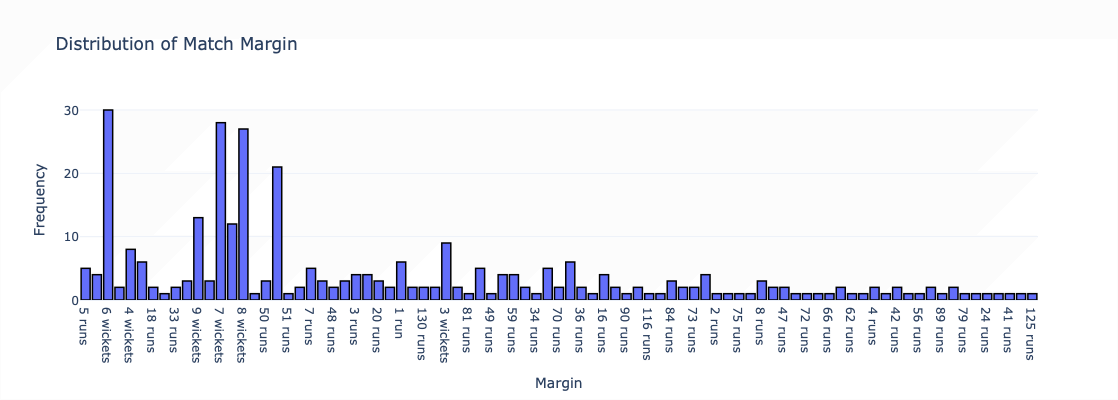

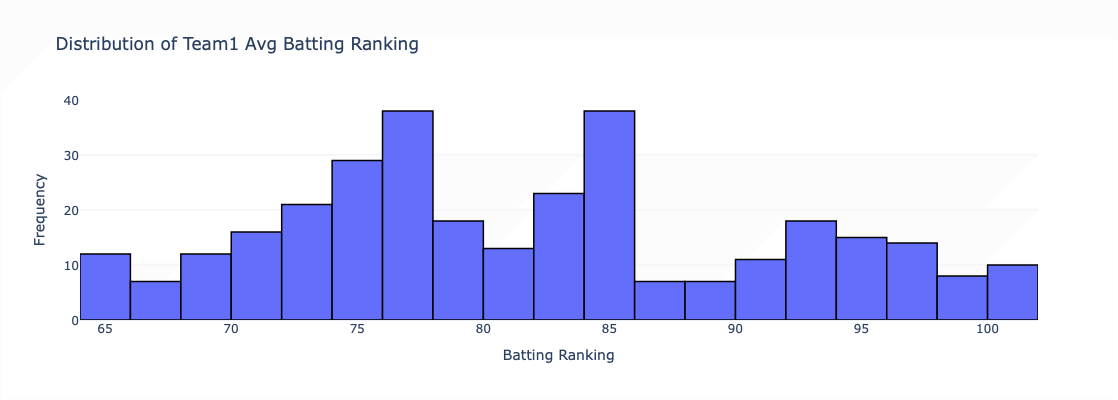

In [114]:
# Bar Plot 1: Distribution of Match Margin
fig_margin = px.histogram(
    wc_final_data_df, 
    x='Margin', 
    nbins=20, 
    title='Distribution of Match Margin',
    labels={'Margin': 'Margin', 'count': 'Frequency'},
    template='plotly_white'
)
fig_margin.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_margin.update_layout(
    xaxis_title='Margin',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the first plot
fig_margin.show()

# Bar Plot 2: Distribution of Team1 Avg Batting Ranking 
fig_batting_ranking = px.histogram(
    wc_final_data_df, 
    x='Team1 Avg Batting Ranking', 
    nbins=20, 
    title='Distribution of Team1 Avg Batting Ranking',
    labels={'Team1 Avg Batting Ranking': 'Batting Ranking', 'count': 'Frequency'},
    template='plotly_white'
)
fig_batting_ranking.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_batting_ranking.update_layout(
    xaxis_title='Batting Ranking',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the second plot
fig_batting_ranking.show()

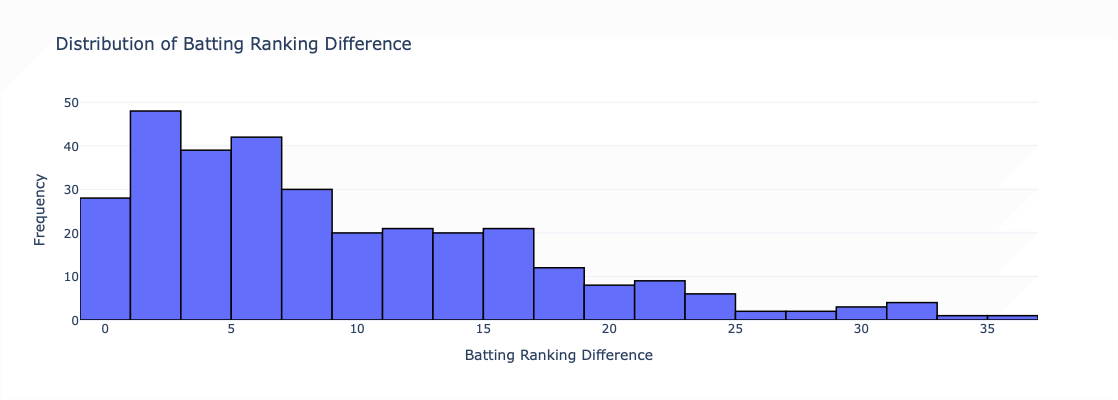

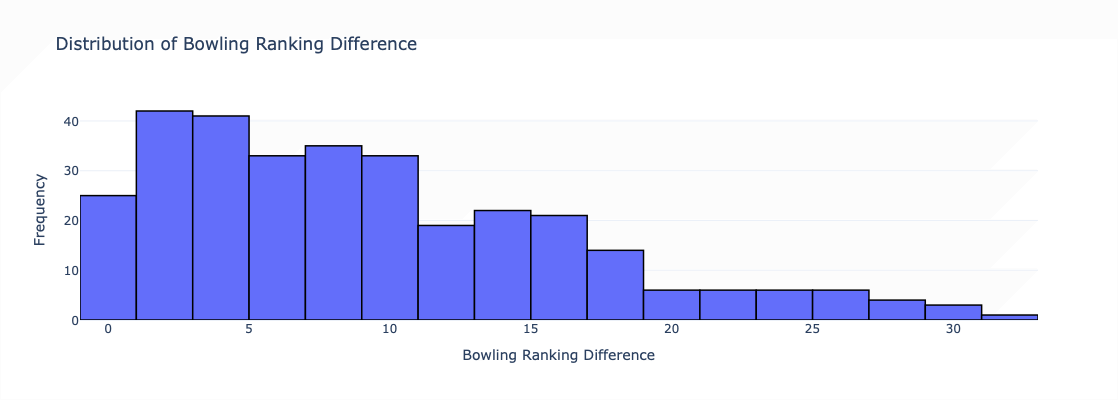

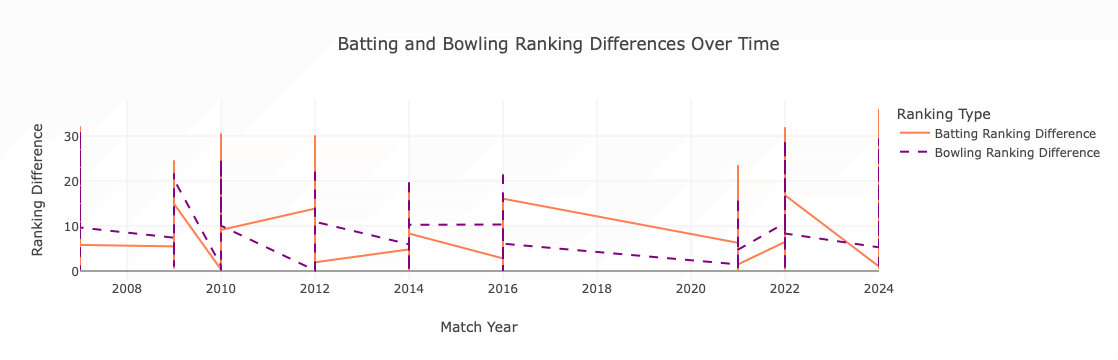

In [115]:
fig_batting_ranking_diff = px.histogram(
    wc_final_data_df, 
    x='Batting Ranking Difference', 
    nbins=20, 
    title='Distribution of Batting Ranking Difference',
    labels={'Batting Ranking Difference': 'Batting Ranking Difference', 'count': 'Frequency'},
    template='plotly_white'
)
fig_batting_ranking_diff.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_batting_ranking_diff.update_layout(
    xaxis_title='Batting Ranking Difference',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the first plot
fig_batting_ranking_diff.show()

# Plot 2: Distribution of Bowling Ranking Difference
fig_bowling_ranking_diff = px.histogram(
    wc_final_data_df, 
    x='Bowling Ranking Difference', 
    nbins=20, 
    title='Distribution of Bowling Ranking Difference',
    labels={'Bowling Ranking Difference': 'Bowling Ranking Difference', 'count': 'Frequency'},
    template='plotly_white'
)
fig_bowling_ranking_diff.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_bowling_ranking_diff.update_layout(
    xaxis_title='Bowling Ranking Difference',
    yaxis_title='Frequency',
    width=600,  
    height=400
)
# Display the second plot
fig_bowling_ranking_diff.show()

# Line plot: Batting and Bowling Ranking Differences Over Time
fig_line = go.Figure()

# Batting Ranking Difference line
fig_line.add_trace(go.Scatter(
    x=wc_final_data_df['Match Year'],
    y=wc_final_data_df['Batting Ranking Difference'],
    mode='lines',
    name='Batting Ranking Difference',
    line=dict(color='coral'),
    hovertext=wc_final_data_df.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}", axis=1),  # Adding team names in hover text
    hoverinfo='text+y'
))

# Bowling Ranking Difference line
fig_line.add_trace(go.Scatter(
    x=wc_final_data_df['Match Year'],
    y=wc_final_data_df['Bowling Ranking Difference'],
    mode='lines',
    name='Bowling Ranking Difference',
    line=dict(color='purple', dash='dash'),
    hovertext=wc_final_data_df.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}", axis=1),  # Adding team names in hover text
    hoverinfo='text+y'
))

# Update layout for line plot
fig_line.update_layout(
    title='Batting and Bowling Ranking Differences Over Time',
    xaxis_title='Match Year',
    yaxis_title='Ranking Difference',
    legend_title='Ranking Type',
    hovermode='x unified'
)

# Display the line plot
fig_line.show()

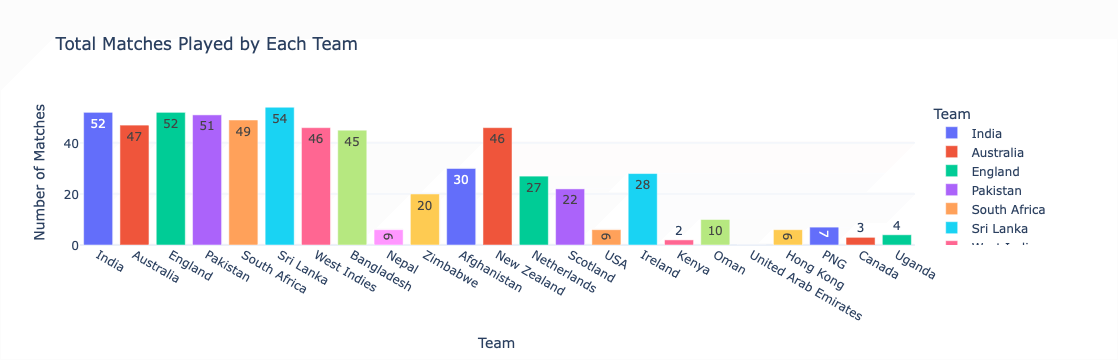

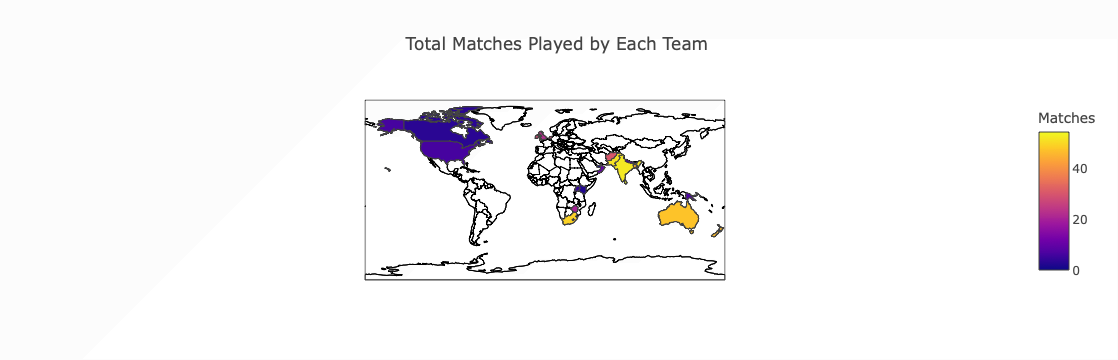

In [118]:
import pandas as pd
import plotly.express as px

# Load the datasets
final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/wc_final_dataset.csv'
matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/MidtermPorject/all_t20_world_cup_matches_results.csv'

wc_final_data_df = pd.read_csv(final_dataset_url)
all_matches_data_df = pd.read_csv(matches_url)

# Bar Plot: Total Matches Played by Each Team
team1_counts = wc_final_data_df['Team1'].value_counts()
team2_counts = wc_final_data_df['Team2'].value_counts()

# Create dataframes for matches played by Team1 and Team2
total_matches_team1 = pd.DataFrame({'Team': team1_counts.index, 'Matches': team1_counts.values})
total_matches_team2 = pd.DataFrame({'Team': team2_counts.index, 'Matches': team2_counts.values})

# Concatenate the dataframes
total_matches = pd.concat([total_matches_team1, total_matches_team2], ignore_index=True)
total_matches = total_matches.groupby('Team', as_index=False).sum()

# GEOSPATIAL: Correct Team to Country Mapping
team_country_mapping = {
    'India': 'India',
    'Australia': 'Australia',
    'England': 'United Kingdom',
    'Pakistan': 'Pakistan',
    'South Africa': 'South Africa',
    'Sri Lanka': 'Sri Lanka',
    'West Indies': 'Jamaica',  # Using Jamaica to represent West Indies
    'Bangladesh': 'Bangladesh',
    'Nepal': 'Nepal',
    'Zimbabwe': 'Zimbabwe',
    'Afghanistan': 'Afghanistan',
    'New Zealand': 'New Zealand',
    'Netherlands': 'Netherlands',
    'Scotland': 'United Kingdom',  # Mapping Scotland to United Kingdom
    'USA': 'United States of America',  # Correct USA name for Plotly
    'Ireland': 'Ireland',
    'Kenya': 'Kenya',
    'Oman': 'Oman',
    'United Arab Emirates': 'United Arab Emirates',
    'Hong Kong': 'Hong Kong',
    'PNG': 'Papua New Guinea',  # Correct PNG name for Plotly
    'Canada': 'Canada',
    'Uganda': 'Uganda'
}

# Ensure all countries are included, even those with zero matches
all_countries = pd.DataFrame({'Team': list(team_country_mapping.keys())})
total_matches = pd.merge(all_countries, total_matches, on='Team', how='left').fillna(0)

# Map teams to their respective countries
total_matches['Country'] = total_matches['Team'].map(lambda x: team_country_mapping.get(x, 'Unknown'))

# Bar Plot: Total Matches Played by Each Team
fig_total_matches = px.bar(
    total_matches, 
    x='Team', 
    y='Matches', 
    color='Team',  
    title='Total Matches Played by Each Team',
    labels={'Matches': 'Number of Matches', 'Team': 'Team'},
    text='Matches',
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Show the bar plot
fig_total_matches.show()

# Create a choropleth map for geospatial distribution of matches
fig_geo_total_matches = px.choropleth(
    total_matches,
    locations='Country',  
    locationmode='country names',  
    color='Matches',  
    hover_name='Country',  
    hover_data=['Matches'],  
    title='Total Matches Played by Each Team',
    color_continuous_scale=px.colors.sequential.Plasma  # Using Plasma scale for color
)

# Customize the layout for the choropleth map
fig_geo_total_matches.update_geos(
    showcoastlines=True,  
    coastlinecolor='Black',  
    landcolor='LightGray',  
    countrycolor='Black',  
    showsubunits=True,  
    showcountries=True
)

# Show the choropleth map
fig_geo_total_matches.show()


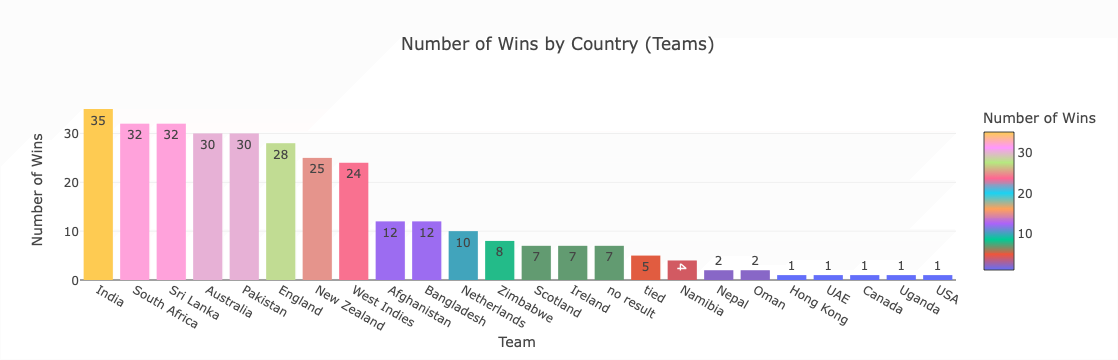

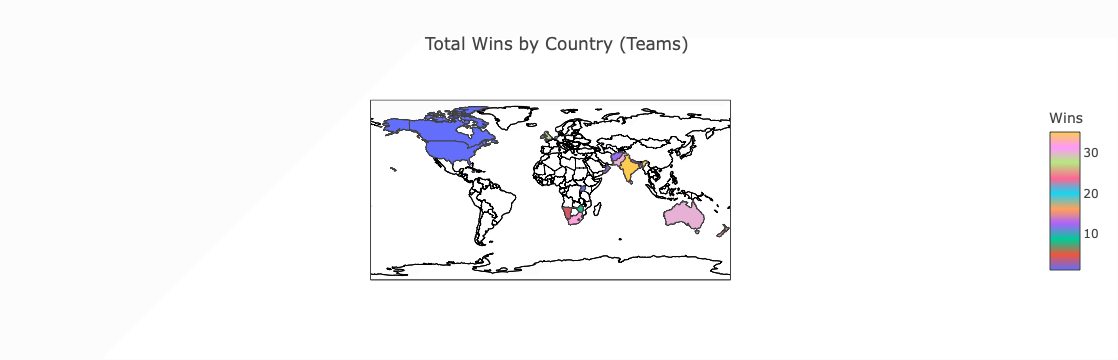

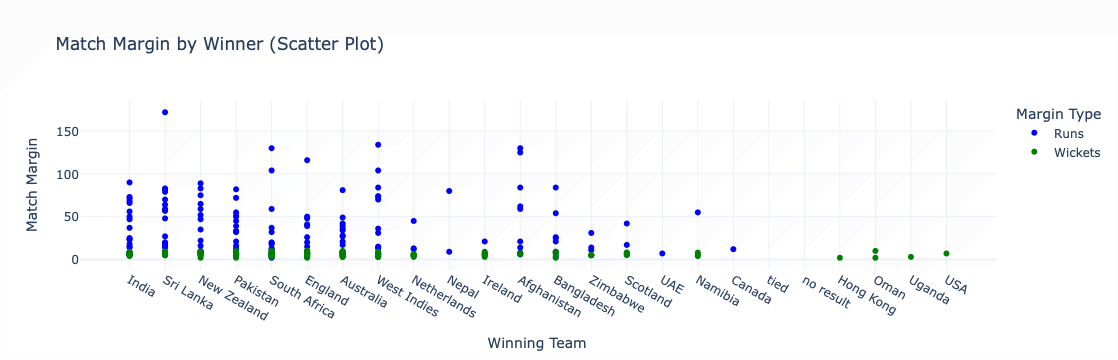

,Winner,Losing Team,Margin (Runs),Margin (Wickets),Margin Type,Margin Numeric
0,India,Pakistan,5.0,NaN,Runs,5.0
1,India,Australia,15.0,NaN,Runs,15.0
2,Pakistan,New Zealand,NaN,6.0,Wickets,6.0
3,India,South Africa,37.0,NaN,Runs,37.0
4,Pakistan,Bangladesh,NaN,4.0,Wickets,4.0
...,...,...,...,...,...,...
312,Afghanistan,Uganda,125.0,NaN,Runs,125.0
313,South Africa,Sri Lanka,NaN,6.0,Wickets,6.0
314,tied,Namibia,NaN,NaN,Wickets,NaN
315,West Indies,PNG,NaN,5.0,Wickets,5.0


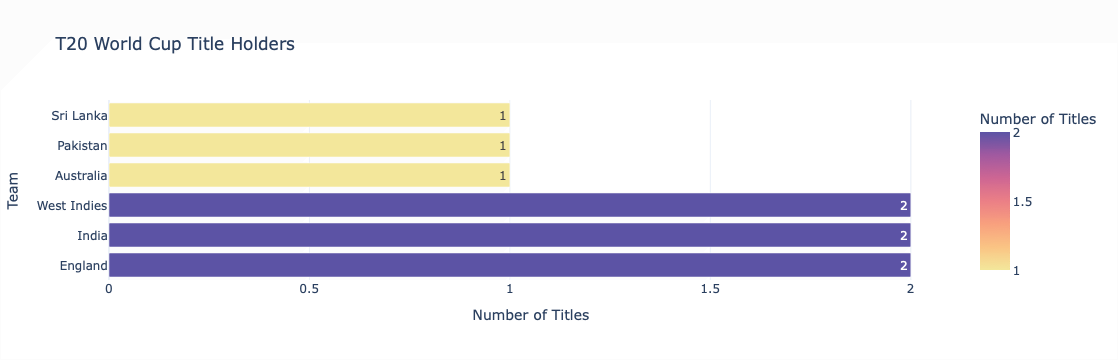

In [128]:
import pandas as pd
import plotly.express as px
import re
from IPython.display import display

# Function to extract numeric values for margins
def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None

# Functions to extract margins (runs and wickets)
def extract_runs_correct(margin):
    if isinstance(margin, str) and 'runs' in margin:
        return float(margin.split()[0])
    return None

def extract_wickets_correct(margin):
    if isinstance(margin, str) and 'wickets' in margin:
        return float(margin.split()[0])
    return None

# Function to determine the losing team based on the winner
def determine_losing_team(row):
    if row['Winner'] == row['Team1']:
        return row['Team2']
    else:
        return row['Team1']

# Load the T20 World Cup dataset
wc_final_data_df = pd.read_csv('updated_wc_final_data_df.csv')

# Count wins per team
win_counts = wc_final_data_df['Winner'].value_counts().reset_index()
win_counts.columns = ['Team', 'Wins']  # Rename columns for clarity

# Bar Plot for Wins
fig_bar_wins = px.bar(
    win_counts, 
    x='Team', 
    y='Wins', 
    labels={'Wins': 'Number of Wins', 'Team': 'Team'},
    text='Wins',  
    title='Number of Wins by Country (Teams)',
    color='Wins',  
    color_continuous_scale=px.colors.qualitative.Plotly
)

fig_bar_wins.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Wins',
    hovermode='closest'
)

fig_bar_wins.show()

# Mapping teams to countries
team_mapping = {
    'India': 'India',
    'Australia': 'Australia',
    'England': 'United Kingdom',
    'Pakistan': 'Pakistan',
    'South Africa': 'South Africa',
    'Sri Lanka': 'Sri Lanka',
    'West Indies': 'Jamaica',
    'Bangladesh': 'Bangladesh',
    'Nepal': 'Nepal',
    'Zimbabwe': 'Zimbabwe',
    'Afghanistan': 'Afghanistan',
    'New Zealand': 'New Zealand',
    'Netherlands': 'Netherlands',
    'Namibia': 'Namibia',
    'Scotland': 'Scotland',
    'USA': 'United States',
    'Ireland': 'Ireland',
    'Kenya': 'Kenya',
    'Oman': 'Oman',
    'United Arab Emirates': 'United Arab Emirates',
    'Hong Kong': 'Hong Kong',
    'PNG': 'Papua New Guinea',
    'Canada': 'Canada',
    'Uganda': 'Uganda'
}

# Geospatial map for wins
wc_final_data_df['Country'] = wc_final_data_df['Winner'].map(team_mapping)
country_wins = wc_final_data_df['Country'].value_counts().reset_index()
country_wins.columns = ['Country', 'Wins']

# Choropleth map for total wins
fig_geo_wins = px.choropleth(
    country_wins,
    locations='Country',
    locationmode='country names',
    color='Wins',
    hover_name='Country',
    hover_data=['Wins'],
    title='Total Wins by Country (Teams)',
    color_continuous_scale=px.colors.qualitative.Plotly
)

fig_geo_wins.update_geos(
    showcoastlines=True,
    coastlinecolor='Black',
    landcolor='LightGray',
    countrycolor='Black',
    showsubunits=True,
    showcountries=True
)

fig_geo_wins.show()

# Add the Losing Team column
wc_final_data_df['Losing Team'] = wc_final_data_df.apply(determine_losing_team, axis=1)

# Scatter Plot for margins
wc_final_data_df['Margin (Runs)'] = wc_final_data_df['Margin'].apply(extract_runs_correct)
wc_final_data_df['Margin (Wickets)'] = wc_final_data_df['Margin'].apply(extract_wickets_correct)

# Select relevant columns, including 'Winner', 'Losing Team', and 'Margin (Runs)' or 'Margin (Wickets)'
plot_data = wc_final_data_df[['Winner', 'Losing Team', 'Margin (Runs)', 'Margin (Wickets)']].dropna(subset=['Winner', 'Losing Team'])

# Create 'Margin Type' column to differentiate between runs and wickets
plot_data['Margin Type'] = plot_data.apply(lambda row: 'Runs' if pd.notnull(row['Margin (Runs)']) else 'Wickets', axis=1)

# Create a 'Margin Numeric' column that combines 'Margin (Runs)' and 'Margin (Wickets)'
plot_data['Margin Numeric'] = plot_data.apply(lambda row: row['Margin (Runs)'] if pd.notnull(row['Margin (Runs)']) else row['Margin (Wickets)'], axis=1)

# Update the scatter plot to reflect the margin by runs or wickets
# Update the scatter plot to reflect the margin by runs or wickets
fig_win_margin = px.scatter(
    plot_data,
    x='Winner',
    y='Margin Numeric',
    title='Match Margin by Winner (Scatter Plot)',
    labels={'Margin Numeric': 'Match Margin', 'Winner': 'Winning Team'},
    color='Margin Type',  # Color by whether the margin was in Runs or Wickets
    hover_data={
        'Winner': True,
        'Margin Numeric': True,
        'Losing Team': True,
        'Margin Type': True  # Show the type of margin in hover info
    },
    color_discrete_map={
        'Runs': 'blue',
        'Wickets': 'green'
    },  # Explicitly map 'Runs' to blue and 'Wickets' to green
    template='plotly_white'  # Use a clean background
)

# Show the updated scatter plot
fig_win_margin.show()


# Display the plot data
display(plot_data)

# Add Match Date column by parsing year, month, and day
wc_final_data_df['Match Date'] = pd.to_datetime(
    wc_final_data_df[['Match Year', 'Match Month', 'Match Day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# List of specific final match dates
final_dates = [
    '2007-09-24',  # September 24, 2007
    '2009-06-21',  # June 21, 2009
    '2010-05-16',  # May 16, 2010
    '2012-10-07',  # October 7, 2012
    '2014-04-06',  # April 6, 2014
    '2016-04-03',  # April 3, 2016
    '2021-11-14',  # November 14, 2021
    '2022-11-13',  # November 13, 2022
    '2024-06-29'   # June 29, 2024
]

final_dates = pd.to_datetime(final_dates)

# Filter dataset for final match dates only
final_matches_df = wc_final_data_df[wc_final_data_df['Match Date'].isin(final_dates)]

# Aggregate number of titles for each team
winner_titles = final_matches_df.groupby('Winner')['Match Date'].apply(list).reset_index(name='Final Dates')
winner_titles['Final Dates'] = winner_titles['Final Dates'].apply(lambda dates: [date.strftime('%Y-%m-%d') for date in dates])
winner_titles['Titles'] = winner_titles['Final Dates'].apply(len)

# Sort by number of titles
winner_titles = winner_titles.sort_values(by='Titles', ascending=False)

# Horizontal bar chart for titles
fig_titles = px.bar(
    winner_titles, 
    y='Winner', 
    x='Titles', 
    orientation='h',
    text='Titles',
    hover_data={'Final Dates': True},
    labels={'Titles': 'Number of Titles', 'Winner': 'Team'},
    title='T20 World Cup Title Holders',
    color='Titles',  # Use the number of titles as the color scale
    color_continuous_scale=px.colors.sequential.Sunset,  # Use a blue color scale for better visualization
    template='plotly_white'  # Clean background template
)


fig_titles.show()


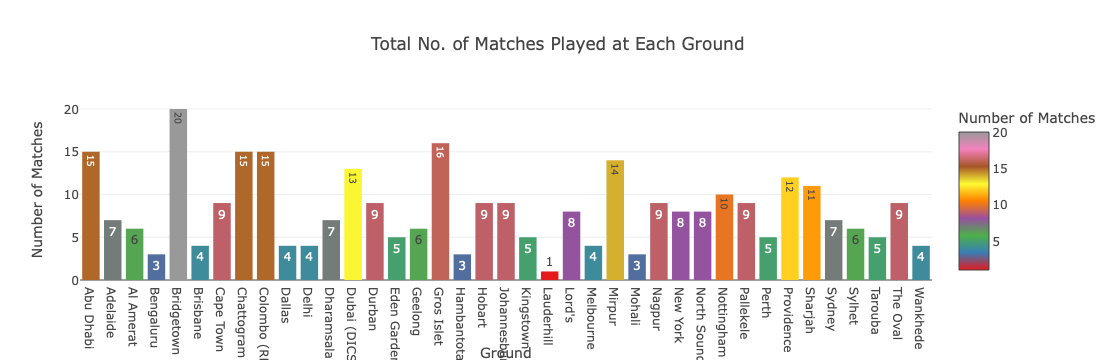

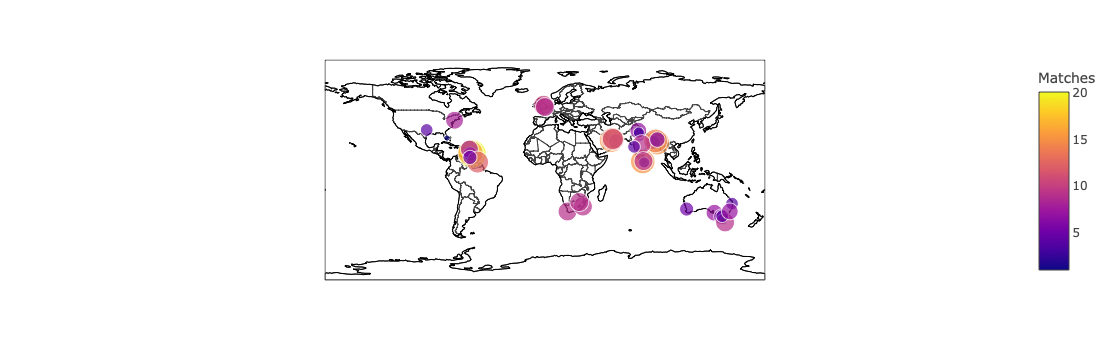

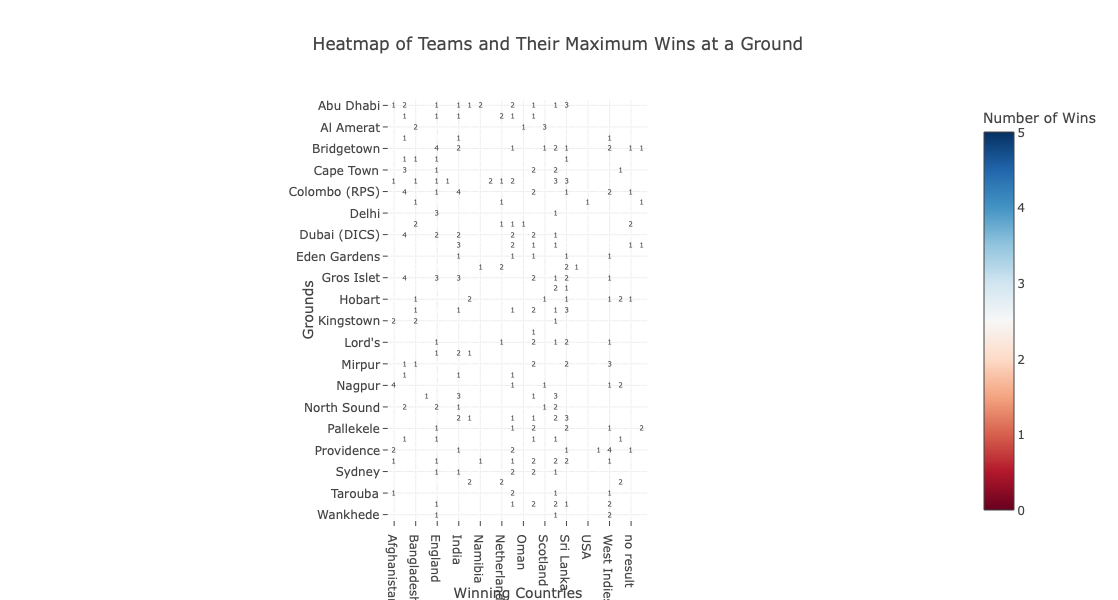

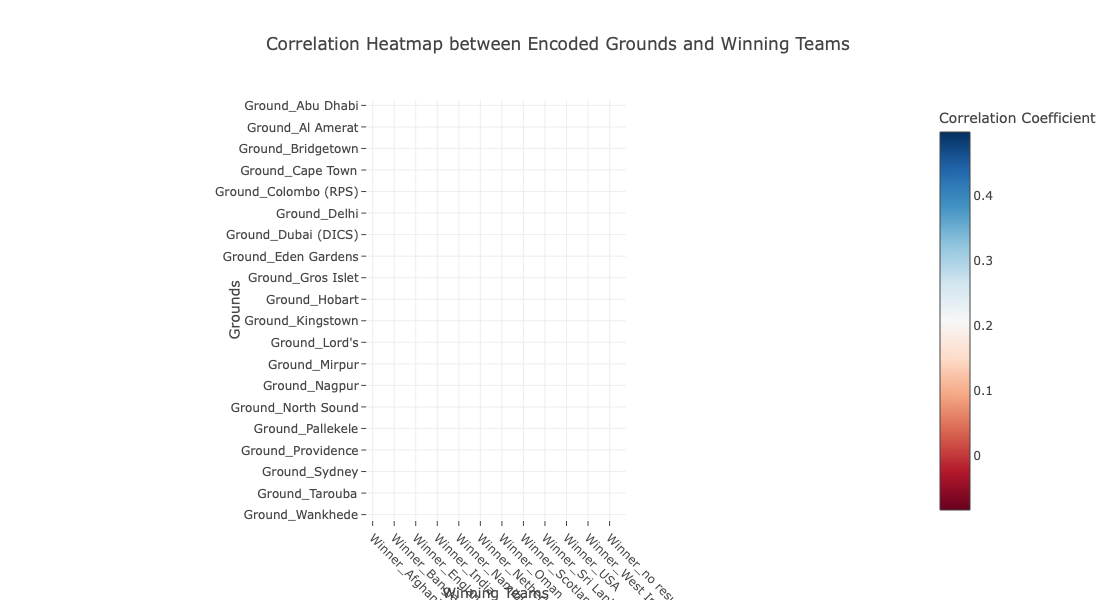

In [100]:
ground_country_mapping = {
        'Abu Dhabi': 'Abu Dhabi',
        'Adelaide': 'Australia',
        'Al Amerat': 'Oman',
        'Bengaluru': 'India',
        'Bridgetown': 'West Indies',
        'Brisbane': 'Australia',
        'Cape Town': 'South Africa',
        'Chattogram': 'Bangladesh',
        'Colombo (RPS)': 'Sri Lanka',
        'Dallas': 'United States',
        'Delhi': 'India',
        'Dharamsala': 'India',
        'Dubai (DICS)': 'United Arab Emirates',
        'Durban': 'South Africa',
        'Eden Gardens': 'India',
        'Geelong': 'Australia',
        'Gros Islet': 'West Indies',
        'Hambantota': 'Sri Lanka',
        'Hobart': 'Australia',
        'Johannesburg': 'South Africa',
        'Kingstown': 'West Indies',
        'Lauderhill': 'United States',
        'Lord\'s': 'United Kingdom',
        'Melbourne': 'Australia',
        'Mirpur': 'Bangladesh',
        'Mohali': 'India',
        'Nagpur': 'India',
        'New York': 'United States',
        'North Sound': 'West Indies',
        'Nottingham': 'United Kingdom',
        'Pallekele': 'Sri Lanka',
        'Perth': 'Australia',
        'Providence': 'West Indies',
        'Sharjah': 'United Arab Emirates',
        'Sydney': 'Australia',
        'Sylhet': 'Bangladesh',
        'Tarouba': 'West Indies',
        'The Oval': 'United Kingdom',
        'Wankhede': 'India'
    }
ground_data = {
        'Abu Dhabi': {'Country': 'United Arab Emirates', 'Lat': 24.4539, 'Lon': 54.3773},
        'Adelaide': {'Country': 'Australia', 'Lat': -34.9285, 'Lon': 138.6007},
        'Al Amerat': {'Country': 'Oman', 'Lat': 23.5881, 'Lon': 58.1364},
        'Bengaluru': {'Country': 'India', 'Lat': 12.9716, 'Lon': 77.5946},
        'Bridgetown': {'Country': 'West Indies', 'Lat': 13.1939, 'Lon': -59.6131},
        'Brisbane': {'Country': 'Australia', 'Lat': -27.4698, 'Lon': 153.0251},
        'Cape Town': {'Country': 'South Africa', 'Lat': -33.9249, 'Lon': 18.4241},
        'Chattogram': {'Country': 'Bangladesh', 'Lat': 22.3475, 'Lon': 91.8123},
        'Colombo (RPS)': {'Country': 'Sri Lanka', 'Lat': 6.9271, 'Lon': 79.9553},
        'Dallas': {'Country': 'United States', 'Lat': 32.7767, 'Lon': -96.7970},
        'Delhi': {'Country': 'India', 'Lat': 28.6139, 'Lon': 77.2090},
        'Dharamsala': {'Country': 'India', 'Lat': 32.2196, 'Lon': 76.3238},
        'Dubai (DICS)': {'Country': 'United Arab Emirates', 'Lat': 25.276987, 'Lon': 55.296249},
        'Durban': {'Country': 'South Africa', 'Lat': -29.8587, 'Lon': 31.0218},
        'Eden Gardens': {'Country': 'India', 'Lat': 22.5697, 'Lon': 88.3426},
        'Geelong': {'Country': 'Australia', 'Lat': -38.1499, 'Lon': 144.3617},
        'Gros Islet': {'Country': 'West Indies', 'Lat': 14.0589, 'Lon': -60.9492},
        'Hambantota': {'Country': 'Sri Lanka', 'Lat': 6.1246, 'Lon': 81.1183},
        'Hobart': {'Country': 'Australia', 'Lat': -42.8821, 'Lon': 147.3272},
        'Johannesburg': {'Country': 'South Africa', 'Lat': -26.2041, 'Lon': 28.0473},
        'Kingstown': {'Country': 'West Indies', 'Lat': 13.1579, 'Lon': -61.2248},
        'Lauderhill': {'Country': 'United States', 'Lat': 26.1483, 'Lon': -80.2133},
        'Lord\'s': {'Country': 'United Kingdom', 'Lat': 51.5264, 'Lon': -0.1965},
        'Melbourne': {'Country': 'Australia', 'Lat': -37.8136, 'Lon': 144.9631},
        'Mirpur': {'Country': 'Bangladesh', 'Lat': 23.8103, 'Lon': 90.4125},
        'Mohali': {'Country': 'India', 'Lat': 30.6928, 'Lon': 76.7480},
        'Nagpur': {'Country': 'India', 'Lat': 21.1458, 'Lon': 79.0882},
        'New York': {'Country': 'United States', 'Lat': 40.7128, 'Lon': -74.0060},
        'North Sound': {'Country': 'West Indies', 'Lat': 17.1381, 'Lon': -61.8456},
        'Nottingham': {'Country': 'United Kingdom', 'Lat': 52.9541, 'Lon': -1.1580},
        'Pallekele': {'Country': 'Sri Lanka', 'Lat': 7.2868, 'Lon': 80.5906},
        'Perth': {'Country': 'Australia', 'Lat': -31.9505, 'Lon': 115.8605},
        'Providence': {'Country': 'West Indies', 'Lat': 6.5030, 'Lon': -55.1708},
        'Sharjah': {'Country': 'United Arab Emirates', 'Lat': 25.3375, 'Lon': 55.5123},
        'Sydney': {'Country': 'Australia', 'Lat': -33.8688, 'Lon': 151.2093},
        'Sylhet': {'Country': 'Bangladesh', 'Lat': 24.8949, 'Lon': 91.8687},
        'Tarouba': {'Country': 'West Indies', 'Lat': 10.2900, 'Lon': -61.4240},
        'The Oval': {'Country': 'United Kingdom', 'Lat': 51.4815, 'Lon': -0.1071},
        'Wankhede': {'Country': 'India', 'Lat': 18.9385, 'Lon': 72.8347}
    }


# Create DataFrame from ground_data
ground_df = pd.DataFrame.from_dict(ground_data, orient='index')
ground_df.reset_index(inplace=True)
ground_df.columns = ['Ground', 'Country', 'Lat', 'Lon']

# Get match counts for each ground
ground_match_counts = wc_final_data_df['Ground'].value_counts().reset_index()
ground_match_counts.columns = ['Ground', 'Matches'] 

# Merge ground data with match counts
merged_data = pd.merge(ground_df, ground_match_counts, on='Ground', how='left')

# Bar chart: Total No. of Matches Played at each Ground
fig_grounds_bar = px.bar(
    merged_data,
    x='Ground',
    y='Matches',
    labels={'Matches': 'Number of Matches', 'Ground': 'Ground'},
    title='Total No. of Matches Played at Each Ground',
    color='Matches',
    color_continuous_scale=px.colors.qualitative.Set1,  # Vibrant color scheme
    text='Matches'
)
fig_grounds_bar.update_layout(
    xaxis_title='Ground',
    yaxis_title='Number of Matches'
)
# Show bar chart
fig_grounds_bar.show()

# Geospatial scatter plot: Match distribution across grounds
fig_grounds = px.scatter_geo(
    merged_data,
    lat='Lat',
    lon='Lon',
    size='Matches',
    hover_name='Ground',
    hover_data=['Country', 'Matches'],
    color='Matches',
    color_continuous_scale=px.colors.sequential.Plasma  # Vibrant color palette
)
fig_grounds.update_geos(
    showcoastlines=True,
    coastlinecolor='Black',
    showsubunits=True,
    showcountries=True
)
# Show geospatial scatter plot
fig_grounds.show()

# Winners at each Ground
ground_matches = wc_final_data_df['Ground'].value_counts().reset_index()
ground_matches.columns = ['Ground', 'Matches']  
ground_matches['Winning Teams'] = ground_matches['Ground'].map(
    lambda x: ', '.join(wc_final_data_df[wc_final_data_df['Ground'] == x]['Winner'].unique())
)

# Heatmap: Teams and Maximum Wins at a Ground
ground_winner_pivot = wc_final_data_df.pivot_table(
    index='Ground', 
    columns='Winner', 
    aggfunc='size', 
    fill_value=0
)
fig_heatmap = px.imshow(
    ground_winner_pivot,
    title='Heatmap of Teams and Their Maximum Wins at a Ground',
    labels={'color': 'Number of Wins'},
    color_continuous_scale='RdBu',  # Red-Blue color scale
    text_auto=True
)
fig_heatmap.update_layout(
    xaxis_title='Winning Countries',
    yaxis_title='Grounds',
    width=800,
    height=600
)
# Show heatmap
fig_heatmap.show()

# Correlation Heatmap - One Hot Encoding
df_encoded = pd.get_dummies(wc_final_data_df[['Winner', 'Ground']])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Filter correlation matrix for 'Winner' and 'Ground'
winner_columns = [col for col in df_encoded.columns if col.startswith('Winner')]
ground_columns = [col for col in df_encoded.columns if col.startswith('Ground')]

correlation_matrix_filtered = correlation_matrix.loc[ground_columns, winner_columns]

# Heatmap for correlation between encoded Grounds and Winning Teams
fig_corr_heatmap = px.imshow(
    correlation_matrix_filtered,
    title='Correlation Heatmap between Encoded Grounds and Winning Teams',
    labels=dict(x='Winning Teams', y='Grounds', color='Correlation Coefficient'),
    color_continuous_scale='RdBu',
    text_auto=':.2f'
)
fig_corr_heatmap.update_layout(
    xaxis_title='Winning Teams',
    yaxis_title='Grounds',
    width=800,
    height=600,
    xaxis=dict(tickangle=45),  # Tilt x-axis labels for better readability
    yaxis=dict(tickangle=0)
)
# Show correlation heatmap
fig_corr_heatmap.show()



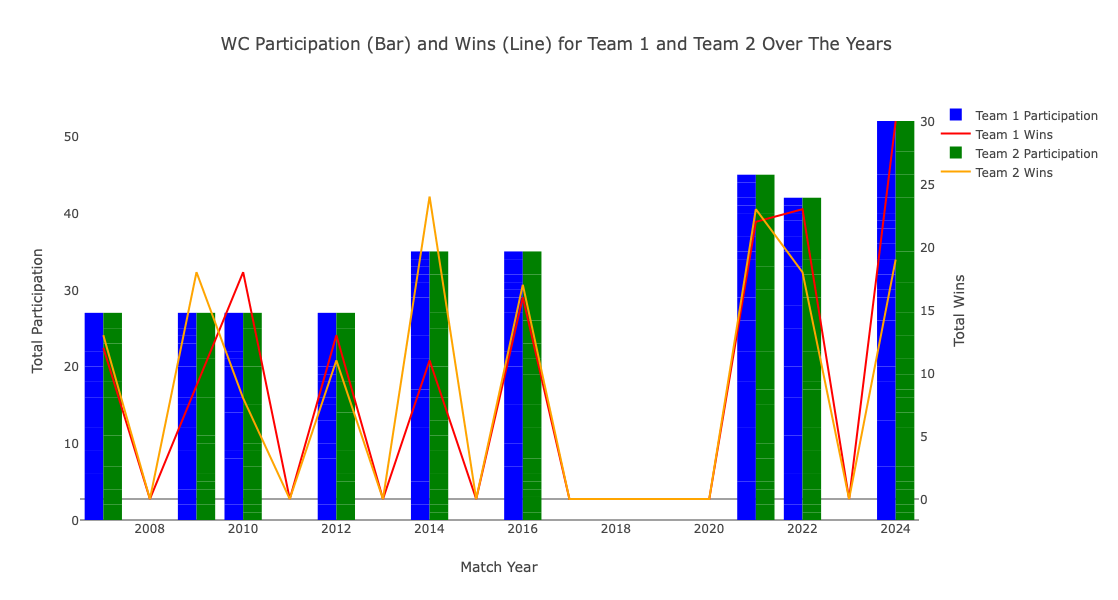

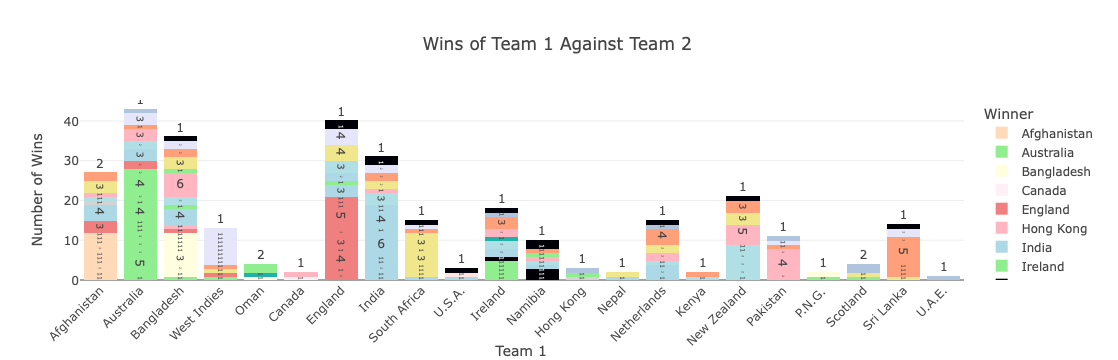

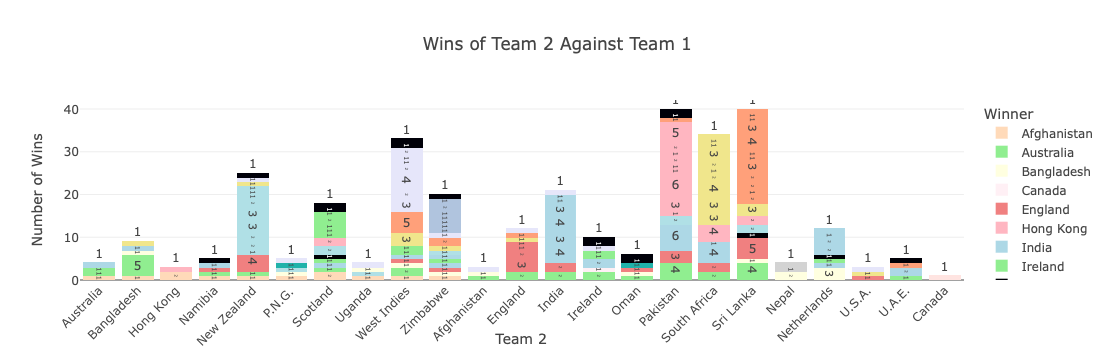

In [73]:

# Ensure 'Match Year' exists
if 'Match Year' not in wc_final_data_df.columns:
    wc_final_data_df['Match Year'] = pd.to_datetime(wc_final_data_df['Match Date'], errors='coerce').dt.year

all_years = pd.Series(range(2007, 2025))

# Team 1 participation and wins
team1_participation = wc_final_data_df.groupby(['Match Year', 'Team1']).size().reset_index(name='Total Participation')
team1_wins = wc_final_data_df[wc_final_data_df['Winner'] == wc_final_data_df['Team1']].groupby('Match Year').size().reset_index(name='Total Wins')

# Merging participation and wins for Team 1
team1_stats = pd.merge(all_years.to_frame(name='Match Year'), team1_participation, how='left', on='Match Year')
team1_stats = pd.merge(team1_stats, team1_wins, how='left', on='Match Year')
team1_stats['Total Participation'] = team1_stats['Total Participation'].fillna(0)
team1_stats['Total Wins'] = team1_stats['Total Wins'].fillna(0)

# Team 2 participation and wins
team2_participation = wc_final_data_df.groupby(['Match Year', 'Team2']).size().reset_index(name='Total Participation')
team2_wins = wc_final_data_df[wc_final_data_df['Winner'] == wc_final_data_df['Team2']].groupby('Match Year').size().reset_index(name='Total Wins')

# Merging participation and wins for Team 2
team2_stats = pd.merge(all_years.to_frame(name='Match Year'), team2_participation, how='left', on='Match Year')
team2_stats = pd.merge(team2_stats, team2_wins, how='left', on='Match Year')
team2_stats['Total Participation'] = team2_stats['Total Participation'].fillna(0)
team2_stats['Total Wins'] = team2_stats['Total Wins'].fillna(0)

# Plot participation and wins for Team 1 and Team 2
fig_team1_team2 = go.Figure()
fig_team1_team2.add_trace(go.Bar(
    x=team1_stats['Match Year'], 
    y=team1_stats['Total Participation'], 
    name='Team 1 Participation', 
    marker_color='blue',
    yaxis='y'
))
fig_team1_team2.add_trace(go.Scatter(
    x=team1_stats['Match Year'], 
    y=team1_stats['Total Wins'], 
    mode='lines', 
    name='Team 1 Wins', 
    line=dict(color='red'),
    yaxis='y2'
))
fig_team1_team2.add_trace(go.Bar(
    x=team2_stats['Match Year'], 
    y=team2_stats['Total Participation'], 
    name='Team 2 Participation', 
    marker_color='green',
    yaxis='y'
))
fig_team1_team2.add_trace(go.Scatter(
    x=team2_stats['Match Year'], 
    y=team2_stats['Total Wins'], 
    mode='lines', 
    name='Team 2 Wins', 
    line=dict(color='orange'),
    yaxis='y2'
))

fig_team1_team2.update_layout(
    title='WC Participation (Bar) and Wins (Line) for Team 1 and Team 2 Over The Years',
    xaxis_title='Match Year',
    yaxis=dict(
        title='Total Participation',
        showgrid=False
    ),
    yaxis2=dict(
        title='Total Wins',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    width=1000,
    height=600,
    barmode='group',
    hovermode='closest'
)
# Show the plot
fig_team1_team2.show()

# Prepare data for bar plots showing wins of Team 1 and Team 2
win_counts = all_matches_data_df.groupby(['Winner', 'Team1', 'Team2']).size().reset_index(name='Wins')
win_counts['Hover Text'] = win_counts.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}<br>Winner: {row['Winner']}<br>Wins: {row['Wins']}", axis=1)

# Define color map for the teams
color_map = {
    'India': 'lightblue',
    'Australia': 'lightgreen',
    'England': 'lightcoral',
    'Pakistan': 'lightpink',
    'South Africa': 'khaki',
    'Sri Lanka': 'lightsalmon',
    'West Indies': 'lavender',
    'Bangladesh': 'lightyellow',
    'Nepal': 'lightgray',
    'Zimbabwe': 'lightsteelblue',
    'Afghanistan': 'peachpuff',
    'New Zealand': 'powderblue',
    'Netherlands': 'lightblue',
    'Scotland': 'lightgreen',
    'U.S.A.': 'mistyrose',
    'Ireland': 'lightgreen',
    'Kenya': 'lightcyan',
    'Oman': 'lightseagreen',
    'United Arab Emirates': 'lightgoldenrodyellow',
    'Hong Kong': 'lightpink',
    'P.N.G': 'lightcoral',
    'Canada': 'lavenderblush',
    'Uganda': 'lightyellow',
    'No Result': 'whitesmoke',
    'Tied': 'lightgrey'
}

# Bar plot for wins of Team 1 against Team 2
fig_team1_over_team2 = px.bar(
    win_counts,
    x='Team1',
    y='Wins',
    color='Winner',
    title='Wins of Team 1 Against Team 2',
    labels={'Wins': 'Number of Wins', 'Team1': 'Team 1'},
    text='Wins',
    hover_name='Hover Text',
    color_discrete_map=color_map
)

fig_team1_over_team2.update_layout(
    xaxis_title='Team 1',
    yaxis_title='Number of Wins',
    hovermode='closest',
    barmode='stack',
    xaxis_tickangle=-45
)

# Show bar plot
fig_team1_over_team2.show()

# Bar plot for wins of Team 2 against Team 1
fig_team2_over_team1 = px.bar(
    win_counts,
    x='Team2',
    y='Wins',
    color='Winner',
    title='Wins of Team 2 Against Team 1',
    labels={'Wins': 'Number of Wins', 'Team2': 'Team 2'},
    text='Wins',
    hover_name='Hover Text',
    color_discrete_map=color_map
)

# Customize the layout
fig_team2_over_team1.update_layout(
    xaxis_title='Team 2',
    yaxis_title='Number of Wins',
    hovermode='closest',
    barmode='stack',
    xaxis_tickangle=-45
)

# Show bar plot
fig_team2_over_team1.show()


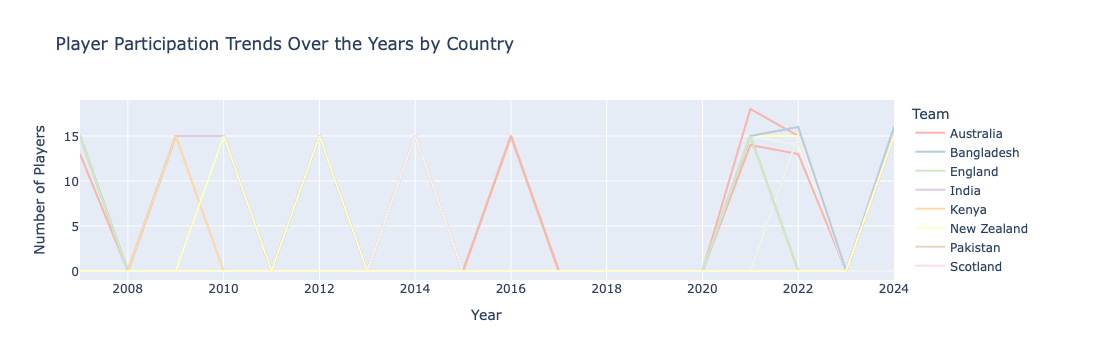

,Year,Team,Player Count
0,2007,Australia,13.0
1,2007,Bangladesh,15.0
2,2007,England,15.0
3,2007,India,15.0
4,2007,Kenya,15.0
...,...,...,...
427,2024,Namibia,16.0
428,2024,Papua New Guinea,15.0
429,2024,Canada,15.0
430,2024,Uganda,15.0


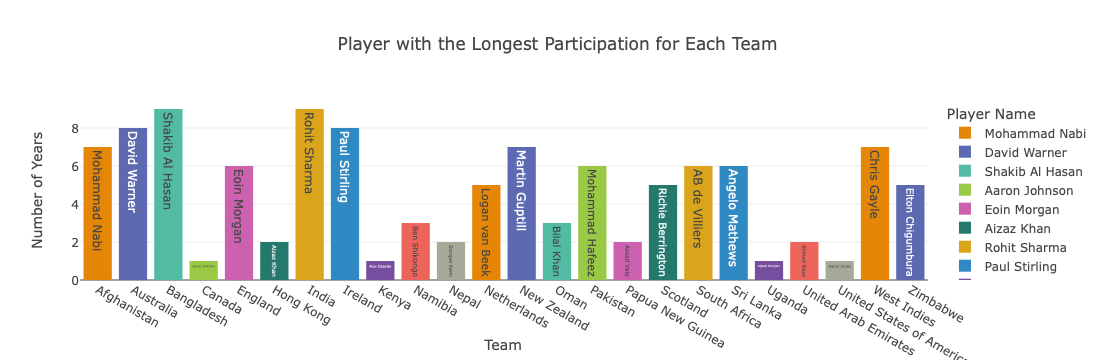

,Player Name,Team,Years Participated
562,Mohammad Nabi,Afghanistan,7
207,David Warner,Australia,8
793,Shakib Al Hasan,Bangladesh,9
3,Aaron Johnson,Canada,1
252,Eoin Morgan,England,6
30,Aizaz Khan,Hong Kong,2
726,Rohit Sharma,India,9
650,Paul Stirling,Ireland,8
44,Alex Obanda,Kenya,1
108,Ben Shikongo,Namibia,3


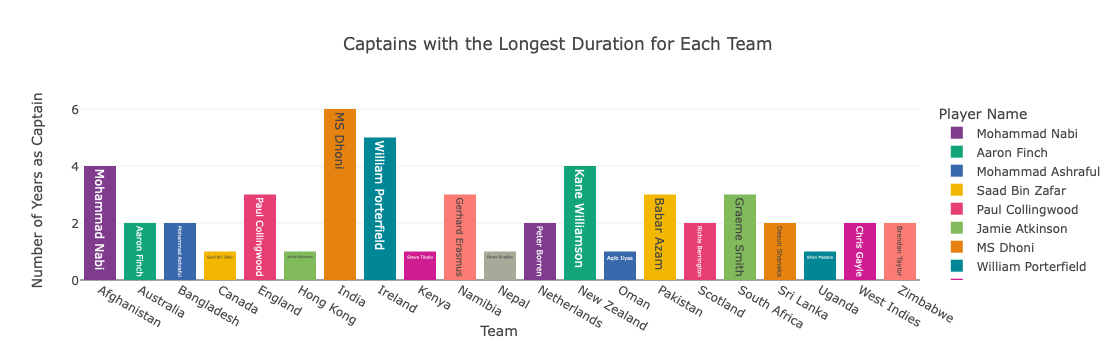

,Player Name,Team,Captaincy Duration
36,Mohammad Nabi,Afghanistan,4
1,Aaron Finch,Australia,2
34,Mohammad Ashraful,Bangladesh,2
56,Saad Bin Zafar,Canada,1
41,Paul Collingwood,England,3
21,Jamie Atkinson,Hong Kong,1
28,MS Dhoni,India,6
68,William Porterfield,Ireland,5
61,Steve Tikolo,Kenya,1
18,Gerhard Erasmus,Namibia,3


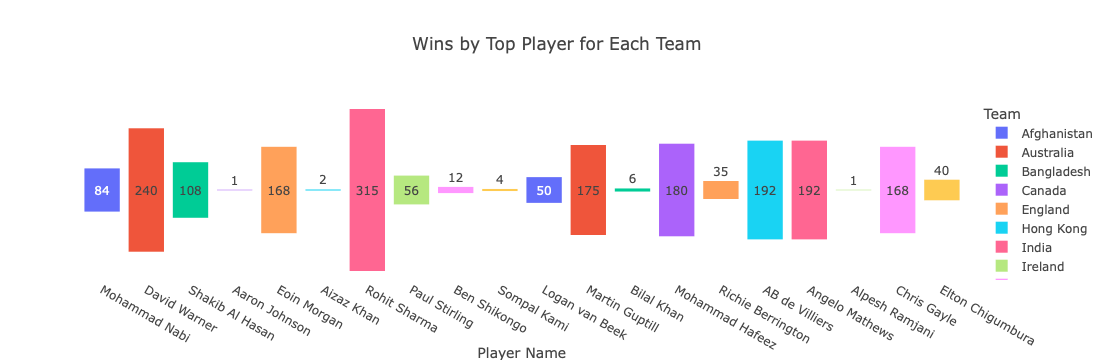

,Player Name,Team,Wins
516,Mohammad Nabi,Afghanistan,84
186,David Warner,Australia,240
727,Shakib Al Hasan,Bangladesh,108
3,Aaron Johnson,Canada,1
230,Eoin Morgan,England,168
27,Aizaz Khan,Hong Kong,2
668,Rohit Sharma,India,315
595,Paul Stirling,Ireland,56
95,Ben Shikongo,Namibia,12
765,Sompal Kami,Nepal,4


In [77]:
import pandas as pd
import plotly.express as px
from IPython.display import display

# Player participation trends
players_by_country = players_df['Team'].value_counts()
player_participation_trends = players_df.groupby(['Year', 'Team']).size().reset_index(name='Player Count')
player_distribution = player_participation_trends.pivot_table(index='Year', columns='Team', values='Player Count', fill_value=0)

# Create all years and teams data
all_years = pd.DataFrame({'Year': list(range(2007, 2025))})
all_teams = player_participation_trends['Team'].unique()
all_years_teams = pd.MultiIndex.from_product([all_years['Year'], all_teams], names=['Year', 'Team']).to_frame(index=False)
player_participation_trends = pd.merge(all_years_teams, player_participation_trends, on=['Year', 'Team'], how='left')
player_participation_trends['Player Count'] = player_participation_trends['Player Count'].fillna(0)

# Line chart for player participation trends with colorful palette
fig_players = px.line(player_participation_trends, 
                    x='Year', 
                    y='Player Count', 
                    color='Team', 
                    title='Player Participation Trends Over the Years by Country',
                    labels={'Player Count': 'Number of Players', 'Year': 'Year'},
                    template='plotly',
                    color_discrete_sequence=px.colors.qualitative.Pastel1)  # Colorful pastel palette

# Show line plot
fig_players.show()

# Display DataFrame
display(player_participation_trends)

# Players with the longest participation
player_participation = players_df.groupby(['Player Name', 'Team'])['Year'].nunique().reset_index(name='Years Participated')
longest_participation = player_participation.loc[player_participation.groupby('Team')['Years Participated'].idxmax()]

# Bar chart for longest participation with colorful palette
fig_longest_participation = px.bar(longest_participation, 
                    x='Team', 
                    y='Years Participated', 
                    color='Player Name', 
                    title='Player with the Longest Participation for Each Team',
                    labels={'Years Participated': 'Number of Years', 'Team': 'Team'},
                    text='Player Name',
                    color_discrete_sequence=px.colors.qualitative.Vivid)  # Vivid colors

# Show bar plot
fig_longest_participation.show()

# Display DataFrame for longest participation
display(longest_participation)

# Merging captains_df and players_df to include captaincy information
if 'Year' in players_df.columns and 'Year' in captains_df.columns:
    merged_data_captains = pd.merge(players_df, captains_df, on=['Player Name', 'Team', 'Year'], how='inner')

    # Players with the longest captaincy duration
    captain_durations = merged_data_captains.groupby(['Player Name', 'Team'])['Year'].nunique().reset_index(name='Captaincy Duration')
    longest_captaincy = captain_durations.loc[captain_durations.groupby('Team')['Captaincy Duration'].idxmax()]

    # Bar chart for captains with longest durations using colorful palette
    fig_longest_captains = px.bar(longest_captaincy, 
                    x='Team', 
                    y='Captaincy Duration', 
                    color='Player Name', 
                    title='Captains with the Longest Duration for Each Team',
                    labels={'Captaincy Duration': 'Number of Years as Captain', 'Team': 'Team'},
                    text='Player Name',
                    color_discrete_sequence=px.colors.qualitative.Bold)  # Bold, vibrant colors

    # Show bar plot for longest captaincy
    fig_longest_captains.show()

    # Display DataFrame for longest captaincy
    display(longest_captaincy)
else:
    print("Error: 'Year' column is missing in either players_df or captains_df.")

# Merging all_matches_data_df and players_df to calculate wins
merged_data = pd.merge(all_matches_data_df, players_df, how='inner', left_on='Winner', right_on='Team')
player_wins = merged_data.groupby(['Player Name', 'Team']).size().reset_index(name='Wins')

# Top players by wins
top_players_by_wins = player_wins.loc[player_wins.groupby('Team')['Wins'].idxmax()]

# Funnel plot for players with maximum wins using colorful palette
fig_funnel = px.funnel(top_players_by_wins, 
                    x='Player Name', 
                    y='Wins', 
                    color='Team', 
                    title='Wins by Top Player for Each Team',
                    labels={'Wins': 'Number of Wins', 'Player Name': 'Player Name'},
                    color_discrete_sequence=px.colors.qualitative.Plotly)  # Plotly vibrant colors

# Show funnel plot
fig_funnel.show()

# Display DataFrame for top players by wins
display(top_players_by_wins)
